### get data

In [96]:
# import pandas_datareader.data as web # https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import datetime as dt
import pandas as pd
print(pd.__version__)

1.2.3


In [97]:
import yfinance as yf # https://pypi.org/project/yfinance/ https://aroussi.com/post/python-yahoo-finance
print(yf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

0.1.59


In [98]:
%autosave 900

Autosaving every 900 seconds


In [99]:
# constants
square = 'SQ'
tesla = 'TSLA'
linde = 'LIN'
microsoft = 'MSFT'
google = 'GOOGL'
sap = 'SAP'

squarev = square + 'v'
teslav = tesla + 'v'
lindev = linde + 'v'
microsoftv = microsoft + 'v'
googlev = google + 'v'
sapv = sap + 'v'

target_stock_tickers = [square, tesla, linde, microsoft, google, sap]
target_stock_volume = [squarev, teslav, lindev, microsoftv, googlev, sapv]
SIZE = len(target_stock_tickers)

FIVE_YEARS = '5y'
FC = 'Forecast'
BT = 'Backtest'

POINT_FIVE = 0.5
FIFTY = 50
TWO_HUNDRED = 200

TEN_BY_FIVE = (10, 5)
SIXTEEN_BY_EIGHT = (16, 8)

In [100]:
def get_ydata(ticker, time):
    obj = yf.Ticker(ticker)
    return obj.history(period = time)

def get_yinfo(ticker):
    obj = yf.Ticker(ticker)
    return obj.info

def get_ypricesv_df(stocks, time):
    first_run = True
    stock_data = None

    for stock in stocks:
        temp = get_ydata(stock, time)

        if first_run:
            stock_data = temp.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1)
            stock_data = stock_data.rename(columns={'Close': stock, 'Volume': stock + 'v'})
            first_run = False
        else:
            stock_data[stock] = temp['Close']
            stock_data[stock + 'v'] = temp['Volume']

    return stock_data

In [101]:
df = get_ypricesv_df(target_stock_tickers, FIVE_YEARS)
df.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-13,15.01,2646500,50.905998,24628000,104.177689,908700,50.754379,20818000,771.909973,1771300,72.824020,747800
2016-04-14,14.82,1754300,50.372002,20661000,104.141632,748100,50.763554,20877100,775.390015,1349600,73.474800,932700
2016-04-15,14.33,2405100,50.902000,18762000,104.853767,987700,51.029476,28793800,780.000000,1585600,72.991364,515500
2016-04-18,14.51,1384700,50.776001,21357000,104.673485,888300,51.772221,23786000,787.679993,1677000,73.763023,690400
2016-04-19,14.09,2539200,49.473999,31787500,107.107315,1226200,51.708035,29596800,776.250000,2197600,74.962341,1447100


### visualize

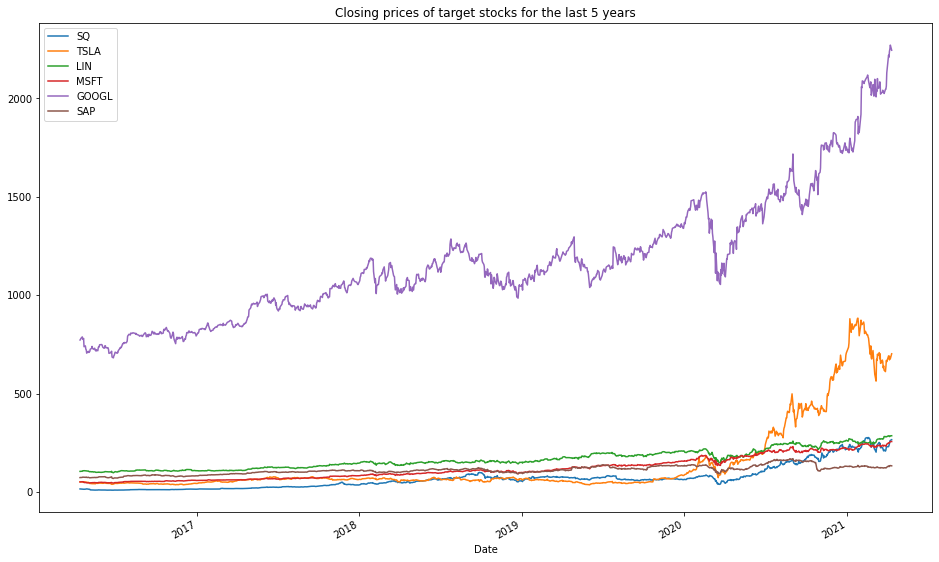

In [102]:
first = True
for stock in target_stock_tickers:
    if first:
        df[stock].plot(label=stock, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
        first = False
    else:        
        df[stock].plot(label=stock)
    
plt.legend()

# df[square].plot(label=square, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
# df[tesla].plot(label=tesla)
# df[linde].plot(label=linde)
# df[microsoft].plot(label=microsoft)
# df[google].plot(label=google)
# df[sap].plot(label=sap)
# plt.legend()

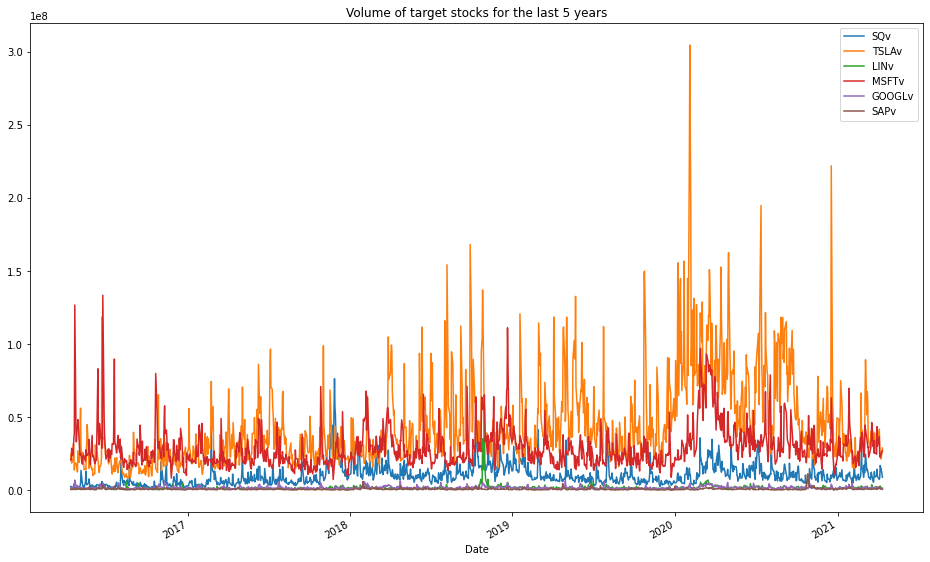

In [103]:
first = True
for vol in target_stock_volume:
    if first:
        df[vol].plot(label=vol, 
                       figsize=(16,10), 
                       title='Volume of target stocks for the last 5 years')
        first = False
    else:        
        df[vol].plot(label=vol)
    
plt.legend()

In [104]:
print(tesla, 'hit high of', df[teslav].max(), 'traded volume on', df[teslav].idxmax())

TSLA hit high of 304694000 traded volume on 2020-02-04 00:00:00


In [105]:
dfdiff = df.diff()
dfdiff.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-14,-0.190001,-892200.0,-0.533997,-3967000.0,-0.036057,-160600.0,0.009174,59100.0,3.480042,-421700.0,0.650780,184900.0
2016-04-15,-0.490000,650800.0,0.529999,-1899000.0,0.712135,239600.0,0.265923,7916700.0,4.609985,236000.0,-0.483437,-417200.0
2016-04-18,0.180000,-1020400.0,-0.125999,2595000.0,-0.180283,-99400.0,0.742744,-5007800.0,7.679993,91400.0,0.771660,174900.0
2016-04-19,-0.420000,1154500.0,-1.302002,10430500.0,2.433830,337900.0,-0.064186,5810800.0,-11.429993,520600.0,1.199318,756700.0


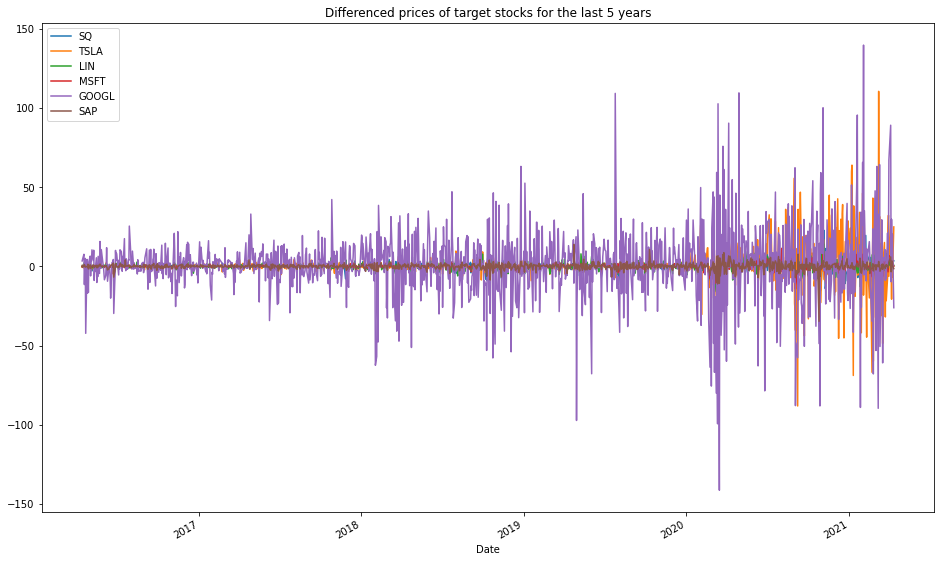

In [106]:
first = True
for stock in target_stock_tickers:
    if first:
        dfdiff[stock].plot(label=stock, 
                       figsize=(16,10), 
                       title='Differenced prices of target stocks for the last 5 years')
        first = False
    else:        
        dfdiff[stock].plot(label=stock)
    
plt.legend()

# df_diff[square].plot(label=square, figsize=(16,10), title='Differenced prices of target stocks for the last 5 years')
# df_diff[tesla].plot(label=tesla)
# df_diff[linde].plot(label=linde)
# df_diff[microsoft].plot(label=microsoft)
# df_diff[google].plot(label=google)
# df_diff[sap].plot(label=sap)
# plt.legend()

In [107]:
from pandas.plotting import scatter_matrix

In [108]:
dfclose = df[[square, tesla, linde, microsoft, google, sap]].copy()
# dfclose[tesla] = df[tesla] #, df[linde], df[microsoft], df[google], df[sap]])
dfclose.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-13,15.01,50.905998,104.177689,50.754379,771.909973,72.824020
2016-04-14,14.82,50.372002,104.141632,50.763554,775.390015,73.474800
2016-04-15,14.33,50.902000,104.853767,51.029476,780.000000,72.991364
2016-04-18,14.51,50.776001,104.673485,51.772221,787.679993,73.763023
2016-04-19,14.09,49.473999,107.107315,51.708035,776.250000,74.962341


/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


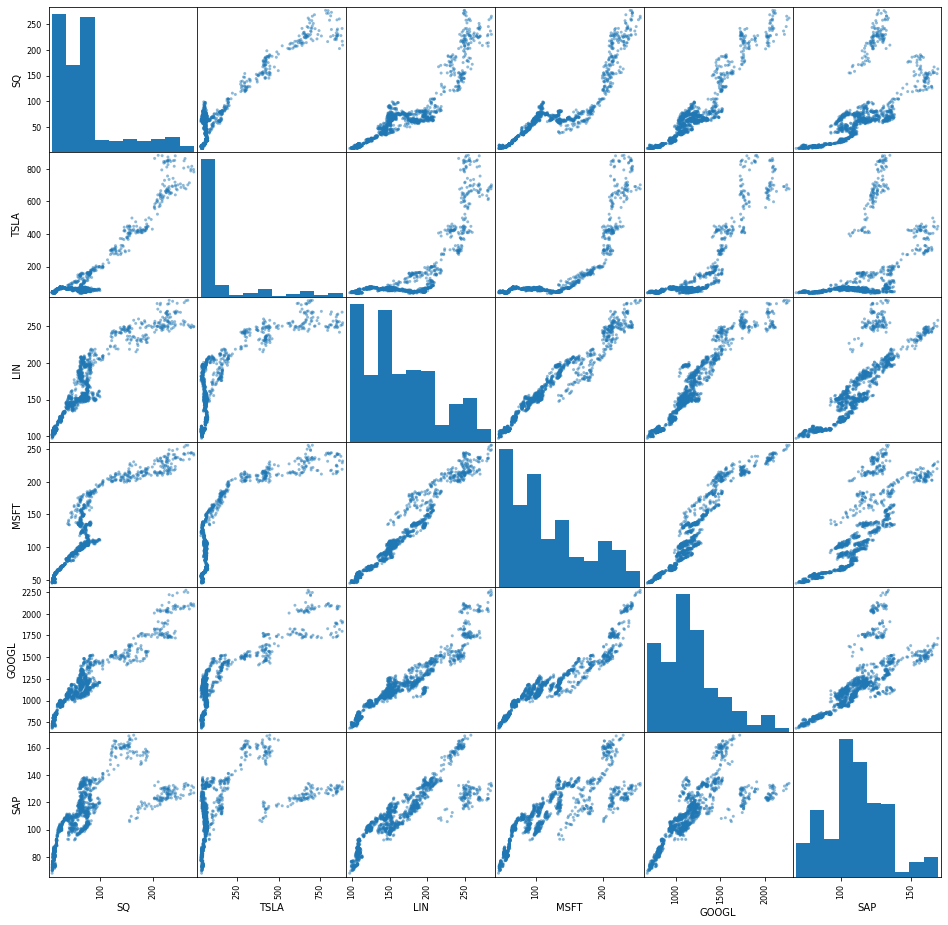

In [109]:
scatter_matrix(dfclose, figsize=(16, 16));

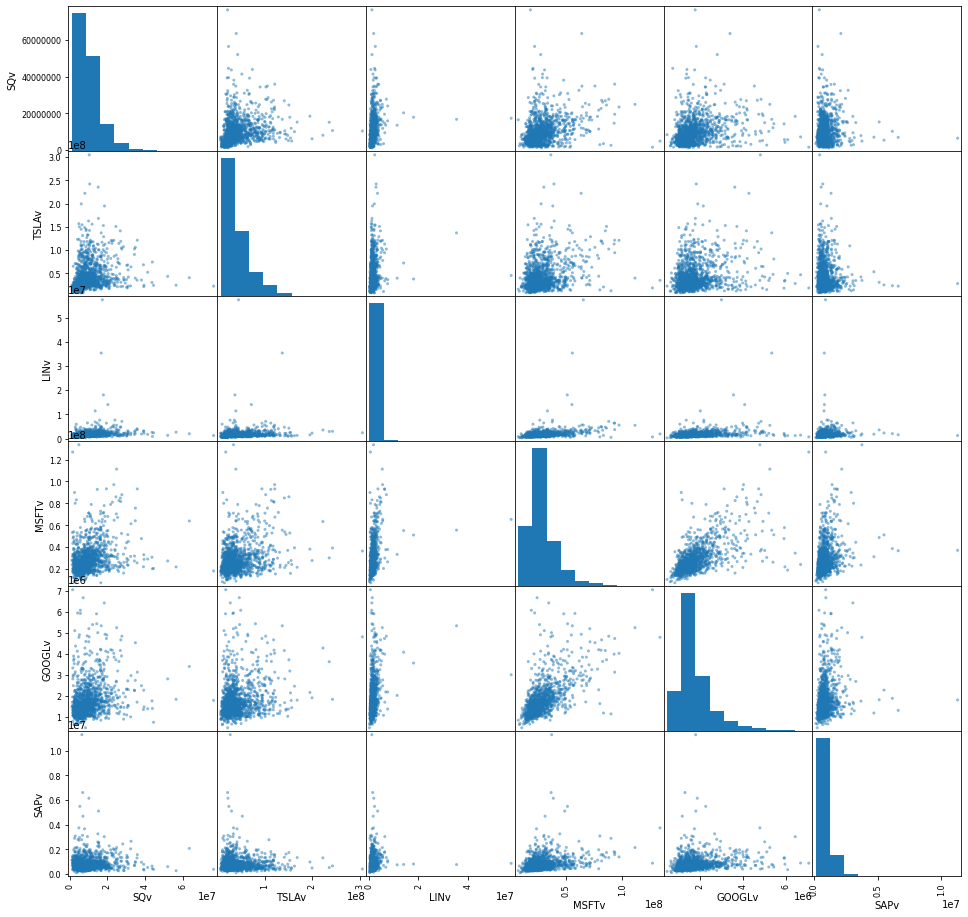

In [110]:
dfvolume = df[[squarev, teslav, lindev, microsoftv, googlev, sapv]].copy()
scatter_matrix(dfvolume, figsize=(16, 16));

In [111]:
df.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-13,15.01,2646500,50.905998,24628000,104.177689,908700,50.754379,20818000,771.909973,1771300,72.824020,747800
2016-04-14,14.82,1754300,50.372002,20661000,104.141632,748100,50.763554,20877100,775.390015,1349600,73.474800,932700
2016-04-15,14.33,2405100,50.902000,18762000,104.853767,987700,51.029476,28793800,780.000000,1585600,72.991364,515500
2016-04-18,14.51,1384700,50.776001,21357000,104.673485,888300,51.772221,23786000,787.679993,1677000,73.763023,690400
2016-04-19,14.09,2539200,49.473999,31787500,107.107315,1226200,51.708035,29596800,776.250000,2197600,74.962341,1447100


In [112]:
# returns
df[square + 'r'] = df[square].pct_change(1)
dfreturns = df[[square + 'r']].copy()
dfreturns = dfreturns.rename(columns={square + 'r': square})

dfreturns[tesla] = df[tesla].pct_change(1)

dfreturns[linde] = df[linde].pct_change(1)
dfreturns[microsoft] = df[microsoft].pct_change(1)

dfreturns[google] = df[google].pct_change(1)
dfreturns[sap] = df[sap].pct_change(1)

dfreturns.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-14,-0.012658,-0.010490,-0.000346,0.000181,0.004508,0.008936
2016-04-15,-0.033063,0.010522,0.006838,0.005238,0.005945,-0.006580
2016-04-18,0.012561,-0.002475,-0.001719,0.014555,0.009846,0.010572
2016-04-19,-0.028946,-0.025642,0.023252,-0.001240,-0.014511,0.016259


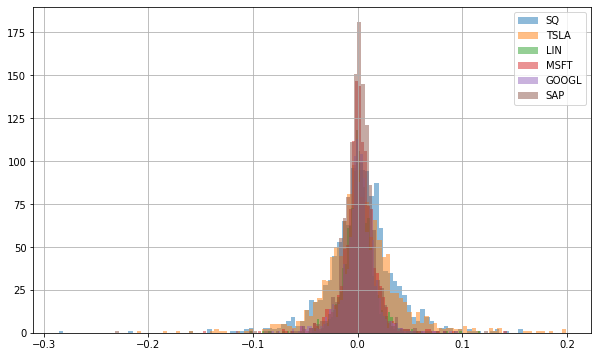

In [113]:
dfreturns[square].hist(bins=100, label=square, alpha=POINT_FIVE, figsize=(10, 6))
dfreturns[tesla].hist(bins=100, label=tesla, alpha=POINT_FIVE)
dfreturns[linde].hist(bins=100, label=linde, alpha=POINT_FIVE)
dfreturns[microsoft].hist(bins=100, label=microsoft, alpha=POINT_FIVE)
dfreturns[google].hist(bins=100, label=google, alpha=POINT_FIVE)
dfreturns[sap].hist(bins=100, label=sap, alpha=POINT_FIVE)
plt.legend()

<AxesSubplot:>

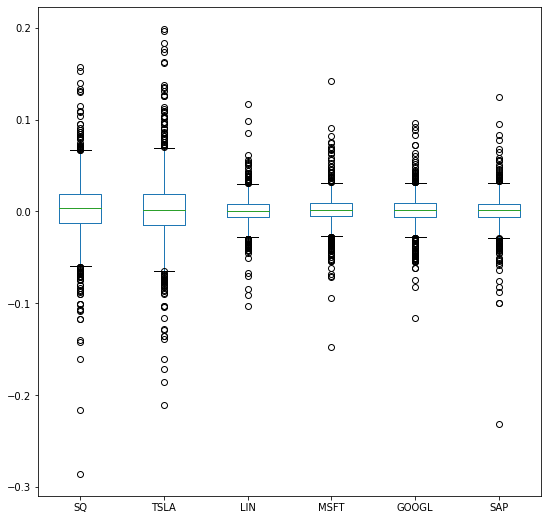

In [114]:
dfreturns.plot(kind='box', figsize=(9,9))

/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


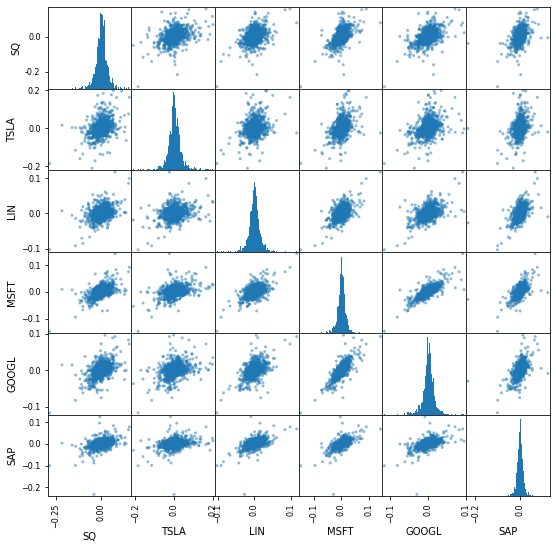

In [115]:
scatter_matrix(dfreturns, figsize=(9,9), hist_kwds={'bins':100});

In [116]:
# cumulative returns
dfreturns_cumulative = pd.DataFrame(index=dfreturns.index.copy())

dfreturns_cumulative[square] = (1 + dfreturns[square]).cumprod()
dfreturns_cumulative[tesla] = (1 + dfreturns[tesla]).cumprod()

dfreturns_cumulative[linde] = (1 + dfreturns[linde]).cumprod()
dfreturns_cumulative[microsoft] = (1 + dfreturns[microsoft]).cumprod()

dfreturns_cumulative[google] = (1 + dfreturns[google]).cumprod()
dfreturns_cumulative[sap] = (1 + dfreturns[sap]).cumprod()

dfreturns_cumulative.tail()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2021-04-06,15.756162,13.586218,2.727167,4.883519,2.862070,1.763841
2021-04-07,16.330446,13.180568,2.700674,4.923713,2.900636,1.782242
2021-04-08,17.213191,13.432601,2.708833,4.989717,2.915405,1.828792
2021-04-09,17.431712,13.299415,2.733791,5.040944,2.941625,1.837168
2021-04-12,17.668222,13.789730,2.739838,5.042127,2.907878,1.818081


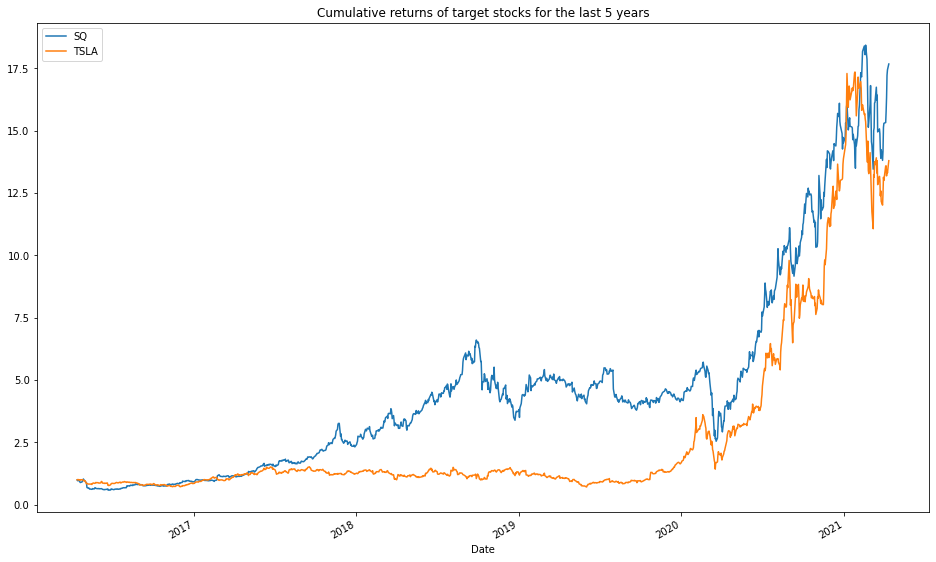

In [117]:
dfreturns_cumulative[square].plot(label=square, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[tesla].plot(label=tesla)
plt.legend()

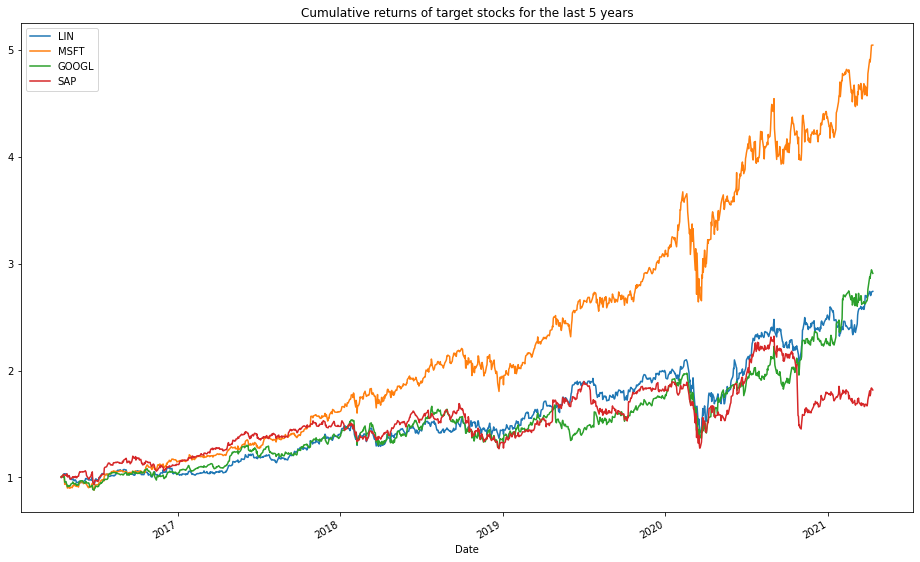

In [118]:
dfreturns_cumulative[linde].plot(label=linde, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[microsoft].plot(label=microsoft)
dfreturns_cumulative[google].plot(label=google)
dfreturns_cumulative[sap].plot(label=sap)
plt.legend()

<AxesSubplot:xlabel='Date'>

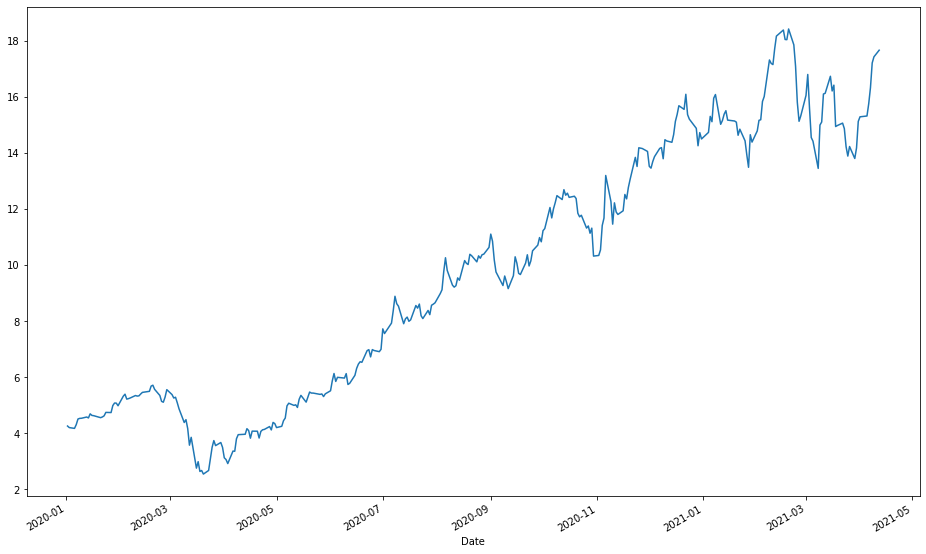

In [119]:
dfreturns_cumulative[square]['2020-01-01':].plot(label=square, figsize=(16,10))

### statsmodels

In [120]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
sqdf = pd.DataFrame(df[square]) # avoid auto boxing into series
print(sqdf.head())
sqdf.describe().T # same as transpose()

               SQ
Date             
2016-04-13  15.01
2016-04-14  14.82
2016-04-15  14.33
2016-04-18  14.51
2016-04-19  14.09


,count,mean,std,min,25%,50%,75%,max
SQ,1258.0,69.779149,59.972504,8.62,24.6825,61.809999,77.050003,276.570007


In [153]:
sqdf.index = pd.DatetimeIndex(sqdf.index).to_period('D') # set index frequency to daily, as it was string
sqdf.index

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [ ]:
ma50 = sqdf.rolling(FIFTY).mean()
ma200 = sqdf.rolling(TWO_HUNDRED).mean()

ma50.plot(label='50-MA', figsize=(16,8))
ma200.plot(label='200-MA')

sqdf.plot(label=square)
plt.legend()

In [ ]:
std50 = sqdf.rolling(FIFTY).std()
std200 = sqdf.rolling(TWO_HUNDRED).std()

std50.plot(label='50-STD', figsize=(16, 8))
std200.plot(label='200-STD')
plt.legend()

In [ ]:
sqdecomp = seasonal_decompose(sqdf, period=12)
sqdecomp_fig = sqdecomp.plot()
sqdecomp_fig.set_size_inches(15, 8)

In [ ]:
# stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_check(ts):
    res = adfuller(ts)
    print('Augmented Dicky-Fuller test:')
    labels = ['ADS test statistic', 'p-value', '# of lags', '# of observations']
    
    for value, label in zip(res, labels):
        print('\t' + label + ': ' + str(value))
        
    if res[1] <= 0.05:
        print('>> data has no unit root and is therefore stationary')
    else:
        print('>> failed to reject null hypothesis (ts not stationary)')

In [ ]:
adfuller_check(sqdf)

In [ ]:
sqdf['diff1'] = sqdf.diff()
adfuller_check(sqdf['diff1'].dropna()) # first value missing
sqdf['diff1'].plot()

In [ ]:
sqdf['diff2'] = sqdf['diff1'].diff()
adfuller_check(sqdf['diff2'].dropna())
sqdf['diff2'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

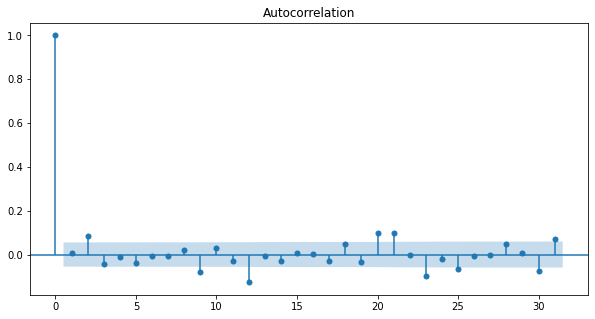

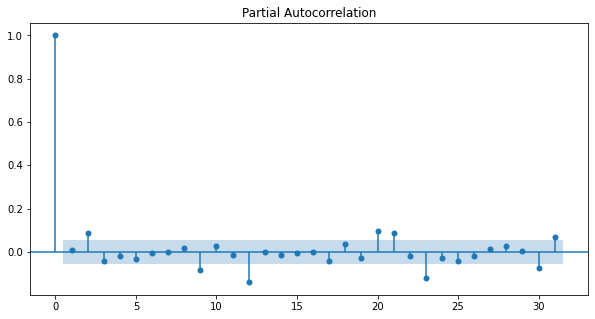

In [154]:
plt.rc("figure", figsize = TEN_BY_FIVE)
acffig = plot_acf(sqdf['diff1'].dropna())
pacffig = plot_pacf(sqdf['diff1'].dropna())

In [155]:
from statsmodels.tsa.arima_model import ARIMA

In [156]:
model = sm.tsa.statespace.SARIMAX(sqdf[square], order=(1,1,1))

In [157]:
res = model.fit()

In [158]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     SQ   No. Observations:                 1258
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3304.588
Date:                Tue, 13 Apr 2021   AIC                           6615.177
Time:                        14:41:57   BIC                           6630.586
Sample:                    04-13-2016   HQIC                          6620.968
                         - 04-12-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8945      0.054    -16.507      0.000      -1.001      -0.788
ma.L1          0.8665      0.061     14.226      0.000       0.747       0.986
sigma2        11.2462      0.181     62.022      0.000      10.891      11.602
===================================================================================
Ljung-Box (L1) (Q):                   2.11   Jarque-Bera (JB):              6318.83
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):              68.52   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

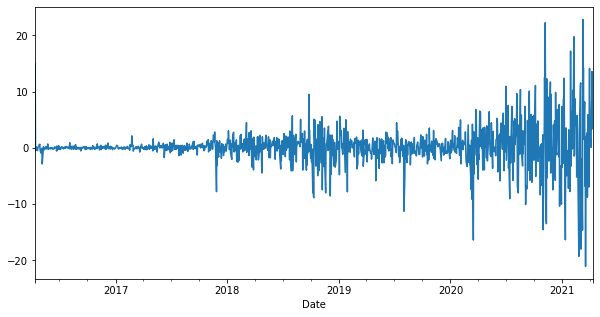

In [159]:
res.resid.plot()

<AxesSubplot:ylabel='Density'>

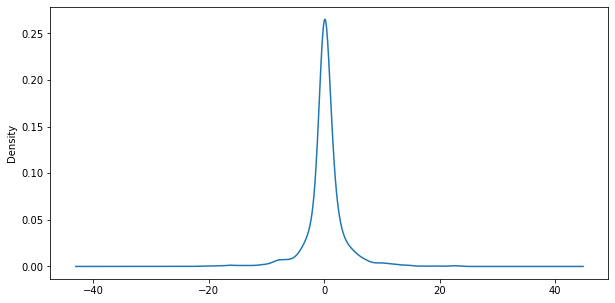

In [160]:
res.resid.plot(kind='kde')

In [191]:
sqdf[BT] = res.predict(start='2021-03-01', end='2021-04-12')
print(sqdf[BT].mean())
sqdf.tail()

230.42082522168428


,SQ,diff1,diff2,Backtest
Date,,,,
2021-04-06,236.500000,6.550003,6.110001,229.642062
2021-04-07,245.119995,8.619995,2.069992,236.582937
2021-04-08,258.369995,13.250000,4.630005,244.806145
2021-04-09,261.649994,3.279999,-9.970001,258.269969
2021-04-12,265.200012,3.550018,0.270020,261.644584


<AxesSubplot:xlabel='Date'>

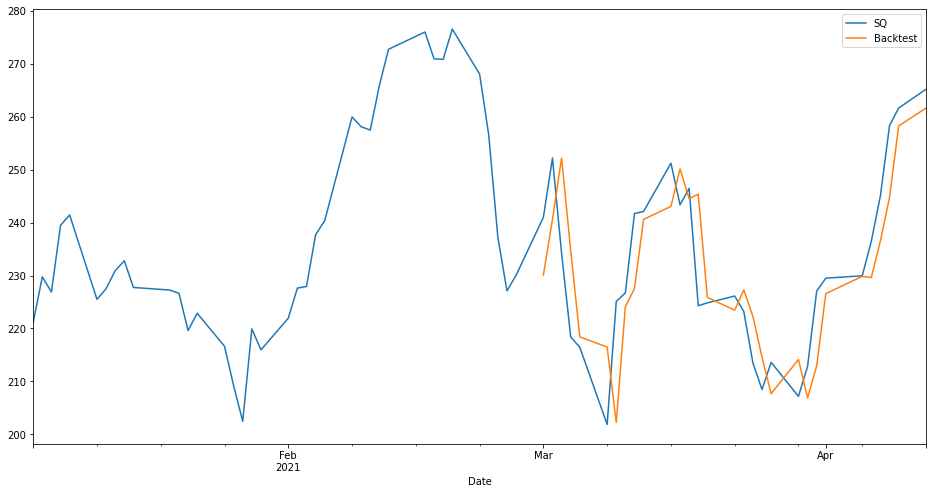

In [162]:
sqdf[[square, BT]]['2021-01-01':].plot(figsize = SIXTEEN_BY_EIGHT)

In [163]:
# from pandas.tseries.offsets import DateOffset
import datetime as dt

In [164]:
sqdf.index[-1]

Period('2021-04-12', 'D')

In [184]:
# extend index
extended_index = pd.date_range(start=dt.date(2021, 4, 13), end=dt.date(2021, 4, 30), freq='D')
extended_index = pd.DatetimeIndex(extended_index).to_period('D')
extended_index

PeriodIndex(['2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
             '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
             '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
             '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30'],
            dtype='period[D]', freq='D')

In [174]:
extended_sqdf = pd.DataFrame(index=extended_index, columns = sqdf.columns)
extended_sqdf.head()

,SQ,diff1,diff2,Backtest
2021-04-13,NaN,NaN,NaN,NaN
2021-04-14,NaN,NaN,NaN,NaN
2021-04-15,NaN,NaN,NaN,NaN
2021-04-16,NaN,NaN,NaN,NaN
2021-04-17,NaN,NaN,NaN,NaN


In [175]:
extended_sqdf.index

PeriodIndex(['2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
             '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
             '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
             '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30'],
            dtype='period[D]', freq='D')

In [176]:
sqdf2 = pd.concat([sqdf, extended_sqdf])
sqdf2.index
# sqdf2.head()

PeriodIndex(['2016-04-13', '2016-04-14', '2016-04-15', '2016-04-18',
             '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
             '2016-04-25', '2016-04-26',
             ...
             '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
             '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30'],
            dtype='period[D]', length=1276, freq='D')

In [192]:
sqdf2[FC] = res.predict(start='2021-03-01', end='2021-04-13')
print(sqdf2[FC].mean())
sqdf2.tail()

263.50195533654295


,SQ,diff1,diff2,Backtest,Forecast
2021-04-26,NaN,NaN,NaN,NaN,NaN
2021-04-27,NaN,NaN,NaN,NaN,NaN
2021-04-28,NaN,NaN,NaN,NaN,NaN
2021-04-29,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

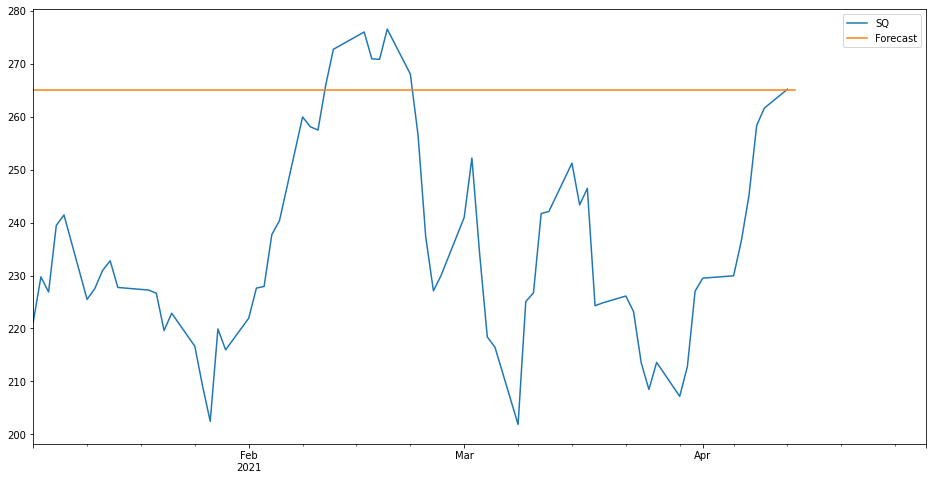

In [190]:
sqdf2[[square, FC]]['2021-01-01':].plot(figsize = SIXTEEN_BY_EIGHT)